# Face Emotion Recognition with Deep Learning

In this Jupyter notebook, we will analyze facial emotions using [**DeepFace**](!https://en.wikipedia.org/wiki/DeepFace), an open-source facial recognition system developed by Facebook's research team.

DeepFace excels at identifying human faces in digital images, leveraging a nine-layer neural network with over 120 million connection weights. Trained on four million images sourced from Facebook users, the system achieves remarkable accuracy.

According to the Facebook Research team, DeepFace attains a performance of **97.53%** of accuracy.

In certain scenarios, DeepFace even surpasses human performance.

### Step 1: Import the necessaries libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import deepface 
from deepface import DeepFace

##### Check the image

In [2]:
img = cv2.imread('surprise.jpeg')

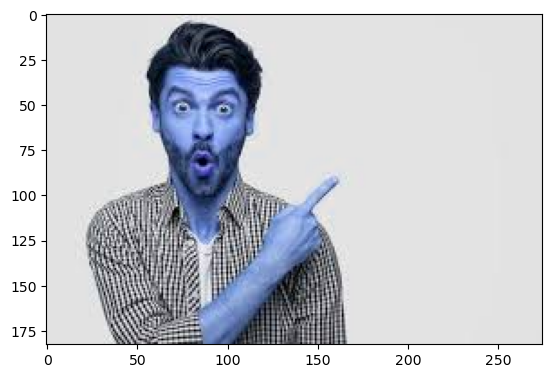

In [3]:
plt.imshow(img) # bgr

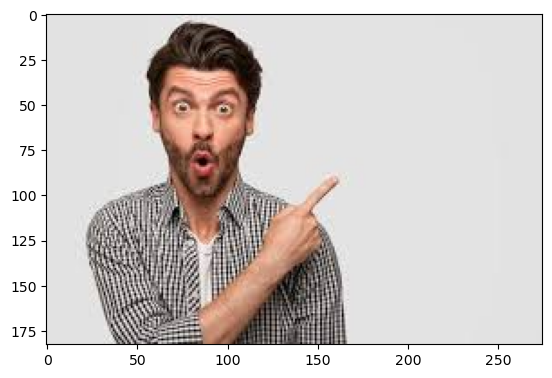

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # rgb

In [5]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████| 4/4 [00:29<00:00,  7.40s/it]   


In [6]:
predictions

[{'emotion': {'angry': 9.372880782620996e-06,
   'disgust': 1.0336798420256671e-11,
   'fear': 0.0017893209587782621,
   'happy': 2.7275428582385075e-07,
   'sad': 7.325695605686633e-08,
   'surprise': 99.99819993972778,
   'neutral': 2.298536557756529e-13},
  'dominant_emotion': 'surprise',
  'region': {'x': 55,
   'y': 26,
   'w': 65,
   'h': 65,
   'left_eye': None,
   'right_eye': None},
  'face_confidence': 0.91,
  'age': 25,
  'gender': {'Woman': 0.0002492044131940929, 'Man': 99.99974966049194},
  'dominant_gender': 'Man',
  'race': {'asian': 0.6129206623882055,
   'indian': 16.97181463241577,
   'black': 1.3890691101551056,
   'white': 41.27785861492157,
   'middle eastern': 21.49033695459366,
   'latino hispanic': 18.257997930049896},
  'dominant_race': 'white'}]

In [7]:
type(predictions)

list

In [8]:
if isinstance(predictions, list) and len(predictions) == 1:
    predictions = predictions[0]

In [9]:
type(predictions)

dict

### Step : download 

In [16]:
# Load the pre-trained face detection model
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray, 1.1, 4)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0))

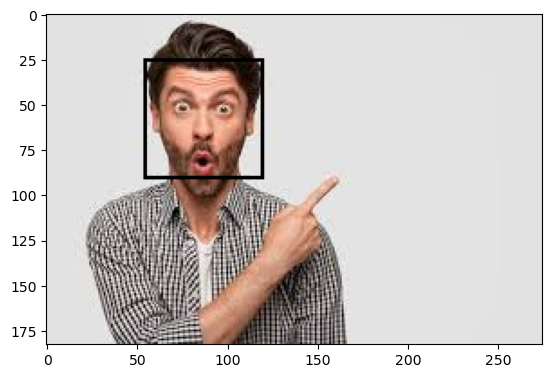

In [17]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [18]:
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img,
            predictions['dominant_emotion'],  
            (0, 50),
            font, 1,
            (0, 0, 255),
            2,
            cv2.LINE_4) ;


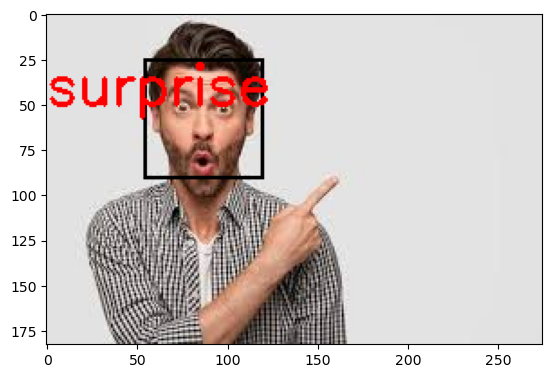

In [19]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [20]:
img1 = cv2.imread('sad.jpg')

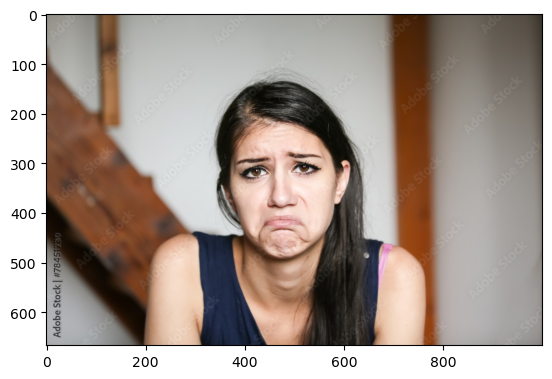

In [21]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

In [22]:
predictions1 = DeepFace.analyze(img1)

Action: race: 100%|██████████| 4/4 [00:08<00:00,  2.05s/it]  


In [23]:
predictions1

[{'emotion': {'angry': 0.0817354244645685,
   'disgust': 0.0001451498633286974,
   'fear': 44.57017481327057,
   'happy': 3.16126569366304e-09,
   'sad': 55.06589412689209,
   'surprise': 8.617922730991268e-05,
   'neutral': 0.28197162318974733},
  'dominant_emotion': 'sad',
  'region': {'x': 344,
   'y': 211,
   'w': 262,
   'h': 262,
   'left_eye': (516, 310),
   'right_eye': (415, 318)},
  'face_confidence': 0.91,
  'age': 28,
  'gender': {'Woman': 99.99961853027344, 'Man': 0.0003779193093578215},
  'dominant_gender': 'Woman',
  'race': {'asian': 4.5607104897499084,
   'indian': 8.681702613830566,
   'black': 0.6367338821291924,
   'white': 22.261208295822144,
   'middle eastern': 38.33741843700409,
   'latino hispanic': 25.522229075431824},
  'dominant_race': 'middle eastern'}]

### Live demo

In [24]:
import cv2
from deepface import DeepFace

# Load the face cascade for detecting faces
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open the webcam
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    
    try:
        # Analyze emotions in the frame
        results = DeepFace.analyze(frame, actions=['emotion'])

        # Handle multiple faces
        if isinstance(results, list) and len(results) > 0:
            dominant_emotion = results[0]['dominant_emotion']  # Extract the first face's dominant emotion
        elif isinstance(results, dict):
            dominant_emotion = results['dominant_emotion']    # Single-face result
        else:
            dominant_emotion = "Unknown"                     # Fallback if no emotion detected

    except Exception as e:
        dominant_emotion = "Error"
        print(f"Error analyzing frame: {e}")

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the dominant emotion
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,
                dominant_emotion,  # Corrected emotion handling
                (50, 50),
                font, 1,
                (0, 0, 255),
                2,
                cv2.LINE_4)

    # Show the output
    cv2.imshow('Demo video', frame)

    # Exit if 'q' is pressed
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

# Release the video capture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


Error analyzing frame: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
